<a href="https://colab.research.google.com/github/Whaleman0423/Deep_Learning_model/blob/main/DL_MLP_20211006.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
from keras.datasets.mnist import load_data
# load_data()  # ((訓練的題目, 訓練的答案), (測試的題目, 測試的答案))
((x_train, y_train), (x_test, y_test)) = load_data()
# 也可以寫成 (x_train, y_train), (x_test, y_test) = load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# 第一步 看一下訓練資料及測試資料有幾筆
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


這個圖是： 3


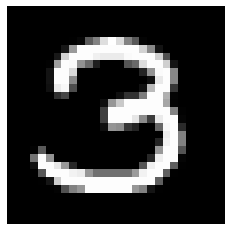

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
c = random.randint(0,59999) # or c = random.randint(0, x_train.shape[0])
plt.axis("off") #去掉x y軸的刻度
plt.imshow(x_train[c], cmap="gray")
print("這個圖是：", y_train[c])

In [ ]:
# x_train[c] # 灰階圖： 0 => 黑色，   255 => 白色

In [ ]:
# 轉成表格形式
import pandas as pd
pd.DataFrame(x_train[c])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,7,92,130,222,255,218,130,88,4,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,23,154,253,253,253,253,253,253,253,253,210,136,19,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,24,210,253,253,253,240,235,235,235,250,253,253,253,207,80,0,0,0,0,0,0,0
7,0,0,0,0,0,2,159,253,250,146,105,31,0,0,0,85,105,220,253,253,207,19,0,0,0,0,0,0
8,0,0,0,0,0,19,253,253,216,0,0,0,0,0,0,0,0,37,147,250,253,135,0,0,0,0,0,0
9,0,0,0,0,0,19,253,253,137,0,0,0,0,0,0,0,0,0,15,233,253,135,0,0,0,0,0,0


In [ ]:
# 資料預處理
# 1. 題目預處理(Normalize)
# Keras 準備的第一個隨機的weights, 跟normalize過的題目圖片比較搭
# 第一種 處理方式：0 - 1     第二種處理方式： -1 - 1

# 目前先用第一種方式比較簡單
# x_train / 255
# 2. 深度學習須將資料攤開  原本是二維的資料 =>攤開成一維
x_train_shape = x_train.reshape(60000, 784) / 255  # x_train.reshape(筆數, 784位元) / 255    28*28 =>784
x_test_shape = x_test.reshape(10000, 784) / 255  # 將測試資料也攤開

In [ ]:
# x_train_shape[59999]

In [ ]:
# 3. 答案 y 的預處理
# 希望的樣子 ：[P0, P1, P2..., P9]  P => 機率
# EX：答案是5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# 也有可能輸出是：[0, 0, 0, 0.2, 0, 0.8, 0, 0, 0, 0]
# y_train # 目前呈現
# => 利用one-hot-encoding
from keras.utils.np_utils import to_categorical # 轉化成 one-hot-encoding
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
# Demo
print("原來：", y_train[0])
print("預處理後：", y_train_cat[0])

原來： 5
預處理後： [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
# 建立模型
# 第一種：蛋糕支架(Sequential), 堆上一層(Layers)
# Layers：Dense(全連階層)
from keras.models import Sequential
from keras.layers import Dense
mlp = Sequential()
# 第一層：input_dim ->告訴她輸入有幾個
# Param：784*128 + 128(bias)
mlp.add(Dense(128, activation="relu", input_dim=784))
# Param：128*10 =1280 =>神經元的連接  +  10 (10個輸出 => 10個激活 => 10個偏差)   
mlp.add(Dense(10, activation="softmax"))
mlp.summary() # 看看模型長的樣子 # Param => 需要調整的參數

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 確定模型的訓練方式
# 隨機(隨便選一組weights)梯度(正確方向)下降
# Loss：最後輸出一個：binary_crossentropy  最後輸出多個：categorical_crossentropy
# optimizer ： 下降的時候優化 => 基於動量的優化方式(我在走的時候不是等速, 而有速度的累積)
mlp.compile(loss="categorical_crossentropy",
      metrics=["accuracy"],
      optimizer="adam")

In [ ]:
# batch：看幾筆(200)，做一次梯度下降(修正)
# epochs：整份考古題看幾次(10)
# 10個 epochs  200batch ： 60000 *10 /200 = 3000(次的梯度修正) 
mlp.fit(x_train_shape, 
        y_train_cat, 
        batch_size=200, 
        epochs=15, 
        validation_split=0.1,
        verbose=2)  # verbose => 進度條要不要印出來 0:完全不印 1:完整印出來

Epoch 1/15
270/270 - 2s - loss: 0.4259 - accuracy: 0.8839 - val_loss: 0.1901 - val_accuracy: 0.9480
Epoch 2/15
270/270 - 1s - loss: 0.1987 - accuracy: 0.9447 - val_loss: 0.1445 - val_accuracy: 0.9632
Epoch 3/15
270/270 - 1s - loss: 0.1482 - accuracy: 0.9579 - val_loss: 0.1133 - val_accuracy: 0.9698
Epoch 4/15
270/270 - 1s - loss: 0.1177 - accuracy: 0.9656 - val_loss: 0.0995 - val_accuracy: 0.9722
Epoch 5/15
270/270 - 1s - loss: 0.0971 - accuracy: 0.9725 - val_loss: 0.0934 - val_accuracy: 0.9742
Epoch 6/15
270/270 - 1s - loss: 0.0814 - accuracy: 0.9771 - val_loss: 0.0849 - val_accuracy: 0.9758
Epoch 7/15
270/270 - 1s - loss: 0.0702 - accuracy: 0.9801 - val_loss: 0.0853 - val_accuracy: 0.9747
Epoch 8/15
270/270 - 1s - loss: 0.0617 - accuracy: 0.9819 - val_loss: 0.0819 - val_accuracy: 0.9770
Epoch 9/15
270/270 - 1s - loss: 0.0537 - accuracy: 0.9847 - val_loss: 0.0761 - val_accuracy: 0.9767
Epoch 10/15
270/270 - 1s - loss: 0.0459 - accuracy: 0.9874 - val_loss: 0.0774 - val_accuracy: 0.9765

In [ ]:
# 直接算出 lose 和 正確率
mlp.evaluate(x_test_shape, y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.0759 - accuracy: 0.9773


[0.07586124539375305, 0.9772999882698059]

In [ ]:
import numpy as np

# predict => 輸出機率  predict_classes => 分類
# mlp.predict(x_test_shape)
# mlp.predict_classes(x_test_shape)
predict_x = mlp.predict(x_test_shape) 
pre = np.argmax(predict_x,axis=1)
# pre


from sklearn.metrics import confusion_matrix
# confusion_matrix()裡面要放的是分類 而不是 整理過後的y_test_cat(one-hot-encoding)
# confusion_matrix(y_test, pre)
pd.DataFrame(confusion_matrix(y_test, pre))

,0,1,2,3,4,5,6,7,8,9
0,969,0,0,2,1,4,1,1,2,0
1,0,1124,3,1,0,1,3,0,3,0
2,4,1,1005,7,2,0,2,4,7,0
3,0,0,2,996,0,1,0,4,3,4
4,1,0,4,1,965,1,2,2,1,5
5,2,1,0,9,0,873,5,0,1,1
6,8,2,0,1,3,7,935,0,2,0
7,2,3,9,6,2,0,0,996,4,6
8,6,0,4,10,2,8,0,5,938,1
9,3,4,0,8,10,5,1,3,3,972


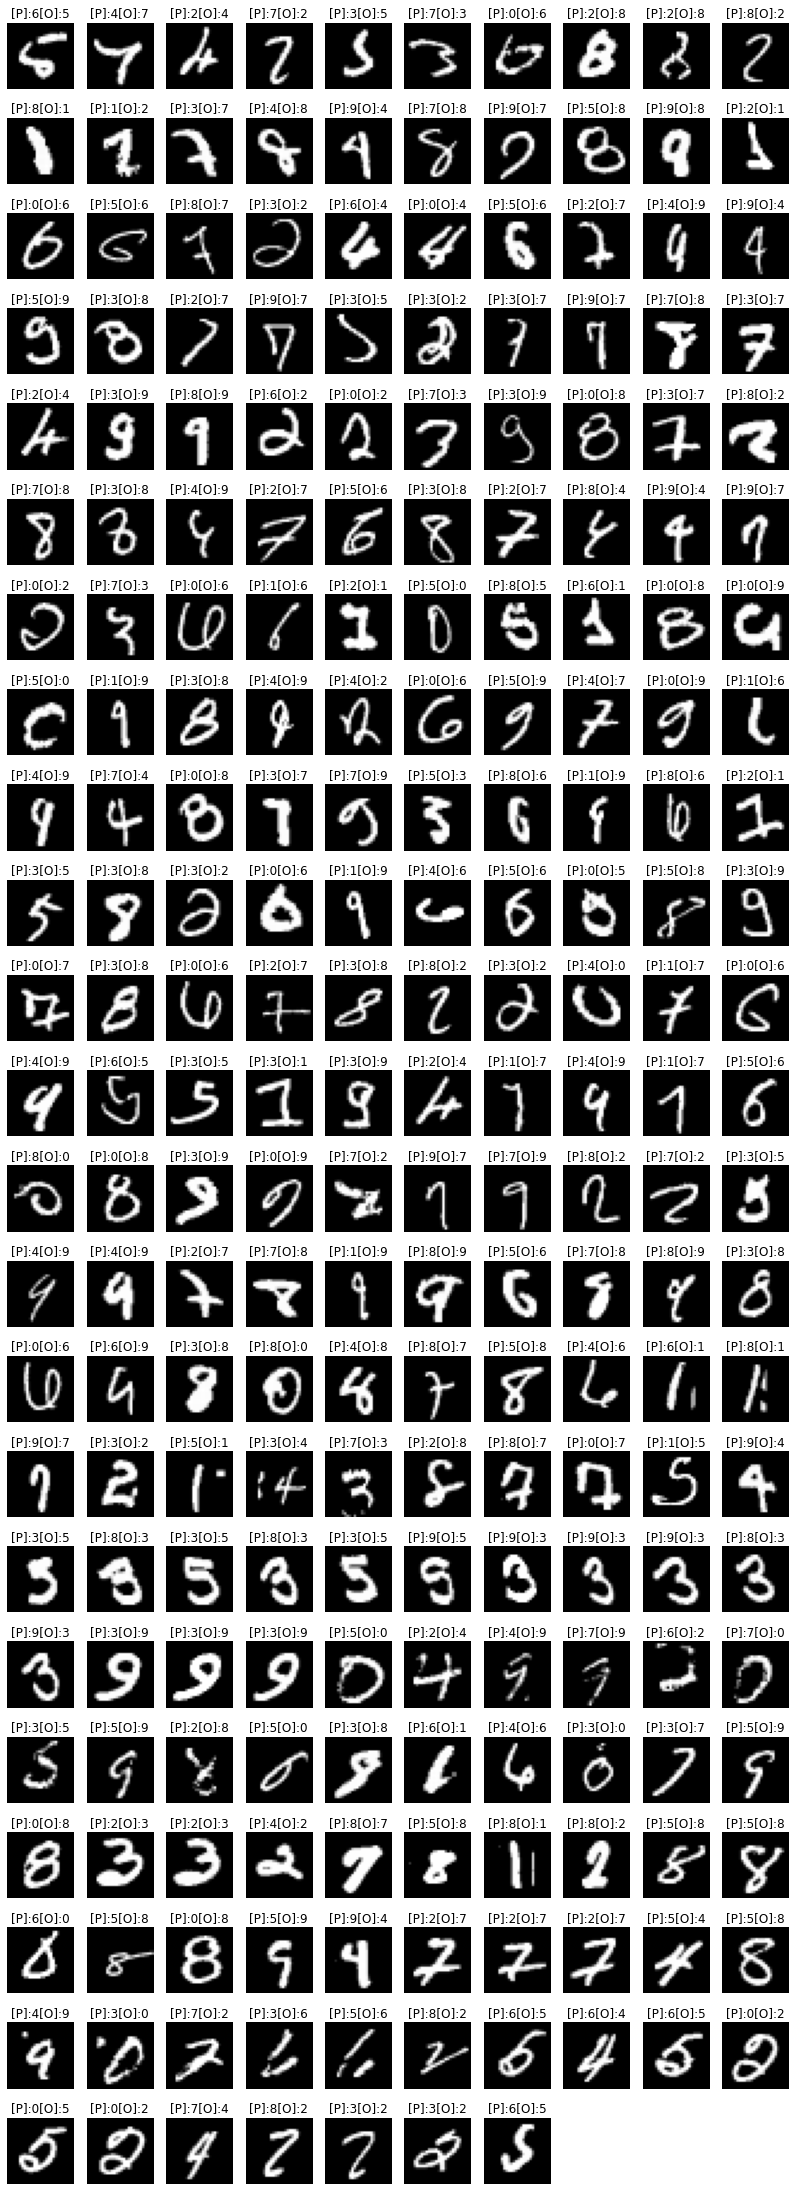

In [ ]:
# 把預測錯誤的資料取出來####
# pre # 預測的
# y_test # 原始答案
# 只有 numpy 才可以這樣直接每個數字比較
# y_test.shape
# pre != y_test
# np.nonzero(pre != y_test)
# np.nonzero(pre != y_test)[0]

# for i in np.nonzero(pre != y_test)[0]:
#   print(i)


# numpy array： nparray[[多個數字]]
diff = np.nonzero(pre != y_test)[0]
# diff
orifalse = y_test[diff] # 預測錯誤的圖的"原本標籤"
prefalse = pre[diff] # 預測錯誤圖的"預測標籤"

# 把圖拿出來
imgfalse = x_test[diff]
# imgfalse

# 整張圖的寬和高
plt.figure(figsize=(14, 40))
# 每一個列就是固定十個
width = 10
height = int(len(imgfalse) / 10) + 1
for (i, img) in enumerate(imgfalse):
  # (列數, 行數, 第幾張圖(i開始))
  plt.subplot(height, width, i+1)
  plt.axis("off")
  t = "[P]:" + str(prefalse[i]) + "[O]:"+str(orifalse[i])
  plt.title(t)
  plt.imshow(img,cmap="gray")